In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Version Used for the Library are 

In [2]:
print("Pandas Version : {}".format(pd.__version__))
print("Numpy  Version : {}".format(np.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))
print("StatModel Version : {}".format(sm.__version__))

Pandas Version : 1.3.4
Numpy  Version : 1.20.3
Seaborn Version : 0.11.2
Matplotlib Version : 3.4.3
StatModel Version : 0.12.2


In [3]:
!ls

BikeSharing_Assignment_Draft_v1       day.csv
BikeSharing_Assignment_Draft_v1.ipynb


In [4]:
# Import the Data to the DataFrame using Pandas

bike_sharing_df = pd.read_csv('day.csv')

In [5]:
# View the Sample data 
bike_sharing_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
452,453,29-03-2019,2,1,3,0,4,1,1,20.260847,24.11520,43.9167,21.416550,834,5299,6133
143,144,24-05-2018,2,0,5,0,2,1,2,27.060000,30.24065,74.0833,13.875164,659,3833,4492
167,168,17-06-2018,2,0,6,0,5,1,1,26.615847,30.01915,73.5833,9.582943,863,3981,4844
427,428,04-03-2019,1,1,3,0,0,0,1,13.359153,15.15105,40.3333,22.416257,710,2713,3423
449,450,26-03-2019,2,1,3,0,1,1,1,18.279153,21.93750,47.7917,25.917007,795,4763,5558


In [6]:
# We can find that most of them are Numerical columns except the "dteday"

bike_sharing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Check Nullvalues in Column wise 
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Row wise also not having any null value 
bike_sharing_df.isnull().sum(axis=1).value_counts()

0    730
dtype: int64

In [9]:
# Check the size of the data frame 
bike_sharing_df.shape


(730, 16)

In [10]:
# Check if any duplicates 
bike_sharing_df.duplicated().sum()

0

In [11]:
bike_sharing_df[bike_sharing_df.duplicated()]
# no duplicate record so nothing to worry 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# Check the Colums name 
### Below are for reference 
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [12]:
bike_sharing_df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

## Data Visualization - Numerical

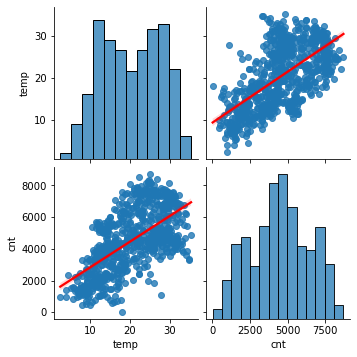

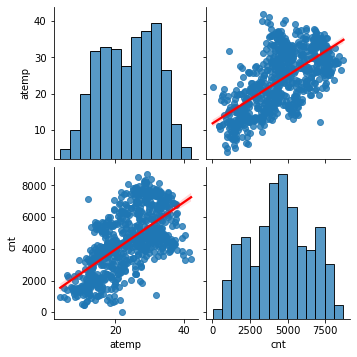

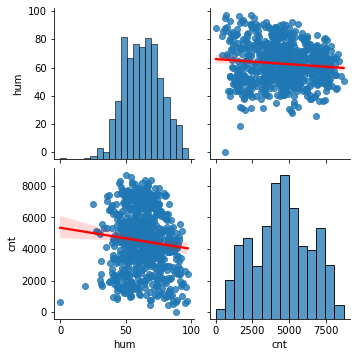

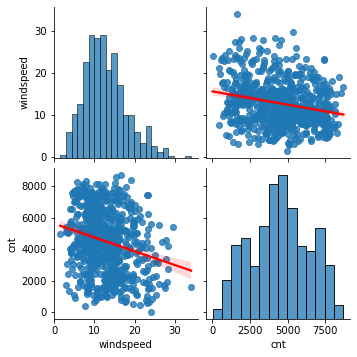

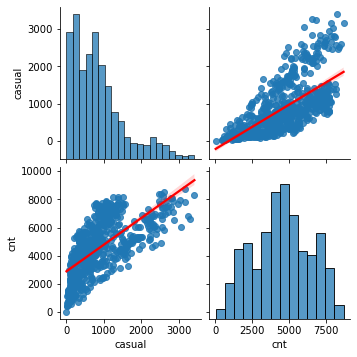

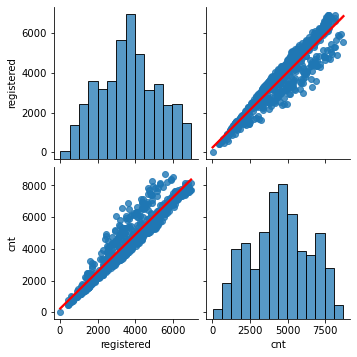

In [13]:
#plt.figure(figsize = (20, 20))
#sns.pairplot(bike_sharing_df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
#plt.show()

## I could have used the above to pair plot however it is going above 1 GB and not able to view in the github .hence done parwise
columns = ["temp","atemp","hum","windspeed","casual","registered"]

for column in columns:
    sns.pairplot(bike_sharing_df[[column,"cnt"]],kind="reg", plot_kws={'line_kws':{'color':'red'}})
                
# We can see the high correlation against 
#   temp ==> atemp 
#   regisstered ==> cnt ( as expected )
#   casual ==> cnt ( as expected )
#   temp ==> cnt

<Figure size 2160x2160 with 0 Axes>

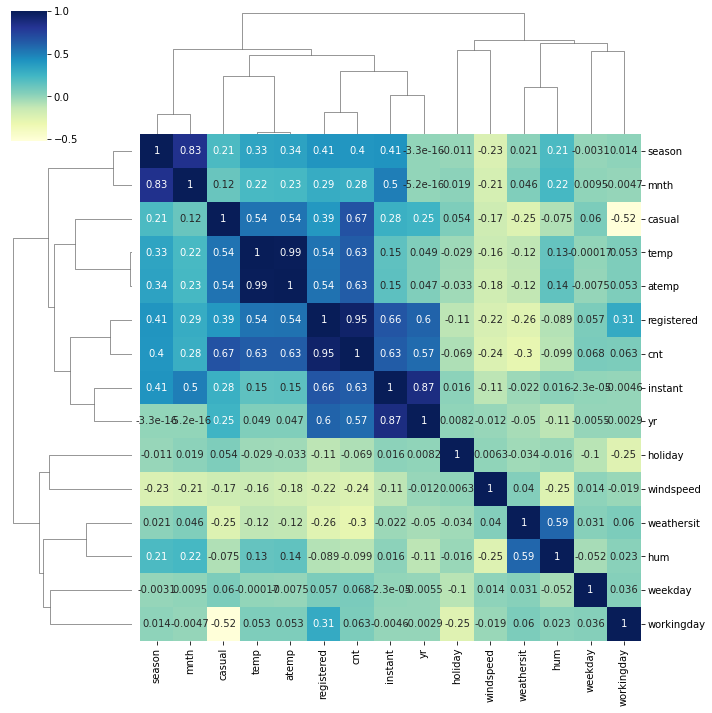

In [14]:
# i used clustermap rather than heat map so that owe can see the correlated one clealy 
# temp and count is crrelated around 0.63 
# Weathersit and hum correlated around 0.59 
# Season and month around - 0.83 
# We ignored the correlation with instant/registered as it will come par tof the cnt correlation 
plt.figure(figsize = (30, 30))
sns.clustermap(bike_sharing_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Data Visualization - Categorical

In [15]:
interested_columns  = [ 'windspeed', 'hum' ,'temp' , 'atemp' ,'casual' , 'registered' , 'cnt']
describe_df = bike_sharing_df[interested_columns].describe().T
describe_df['IQR'] = describe_df['75%'] - describe_df['25%']

for col in describe_df.index:
    W1 = bike_sharing_df[col].quantile(.25) - 1.5 * describe_df.loc[col,'IQR']
    W2 = bike_sharing_df[col].quantile(.75) + 1.5 * describe_df.loc[col,'IQR']
    describe_df.loc[col,'Whisker1'] = W1
    describe_df.loc[col,'Whisker2'] = W2
    filt = (bike_sharing_df[col] < W1 ) | (bike_sharing_df[col] > W2)
    describe_df.loc[col,'max_outliers_value'] = round(bike_sharing_df[filt][col].max(),2)
    describe_df.loc[col,'min_outliers_value'] = round(bike_sharing_df[filt][col].min(),2)
    describe_df.loc[col,'no_of_outliers'] = len(bike_sharing_df[filt][col])
describe_df['no_of_outliers'] = describe_df['no_of_outliers'].astype('int')
describe_df.sort_values('no_of_outliers',ascending=False)['no_of_outliers']

casual        44
windspeed     13
hum            2
temp           0
atemp          0
registered     0
cnt            0
Name: no_of_outliers, dtype: int64

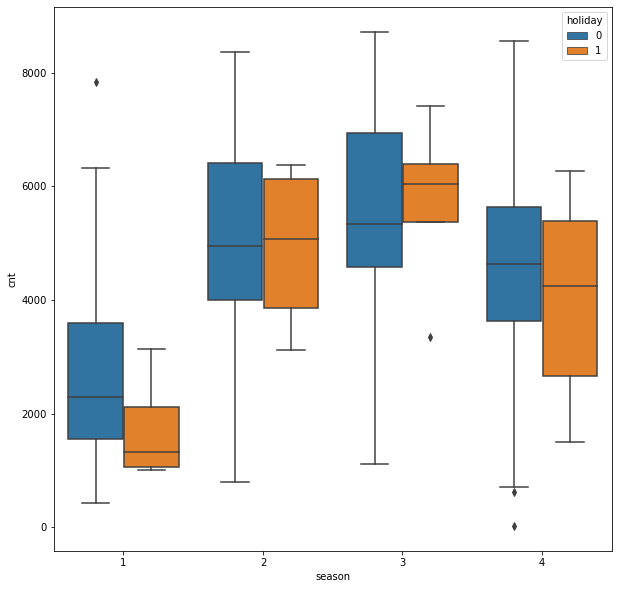

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'season' , y = 'cnt', hue='holiday' , data = bike_sharing_df,)
plt.show()

# Checked if any change depending on the Holiday and you can see it doesn;t for the season 2 "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"

1. Median of bike rental count is highest for fall and summer  season. . There is an outlier for season 1 as well 
3. Highest bike rental is for year 2019 as you can see from media and the Max. 
4. Highest bike rental count is for month 9 i.e. September.
5. July seems to be the Highest mean for the bike rent , however max seems to be in september and least seems to be october 
7. Highest bike rental count is for no holiday days marked with 0.
8. All days more or less has the same Bike rental pattern i.e the median 
9.Bike rental median is highest for weathersit 1(Clear, Few clouds, Partly cloudy, Partly cloudy) and the  lowest is for weathersit 3(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
10. Checked if any change depending on the Holiday and you can see it doesn;t for the season 2 "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"

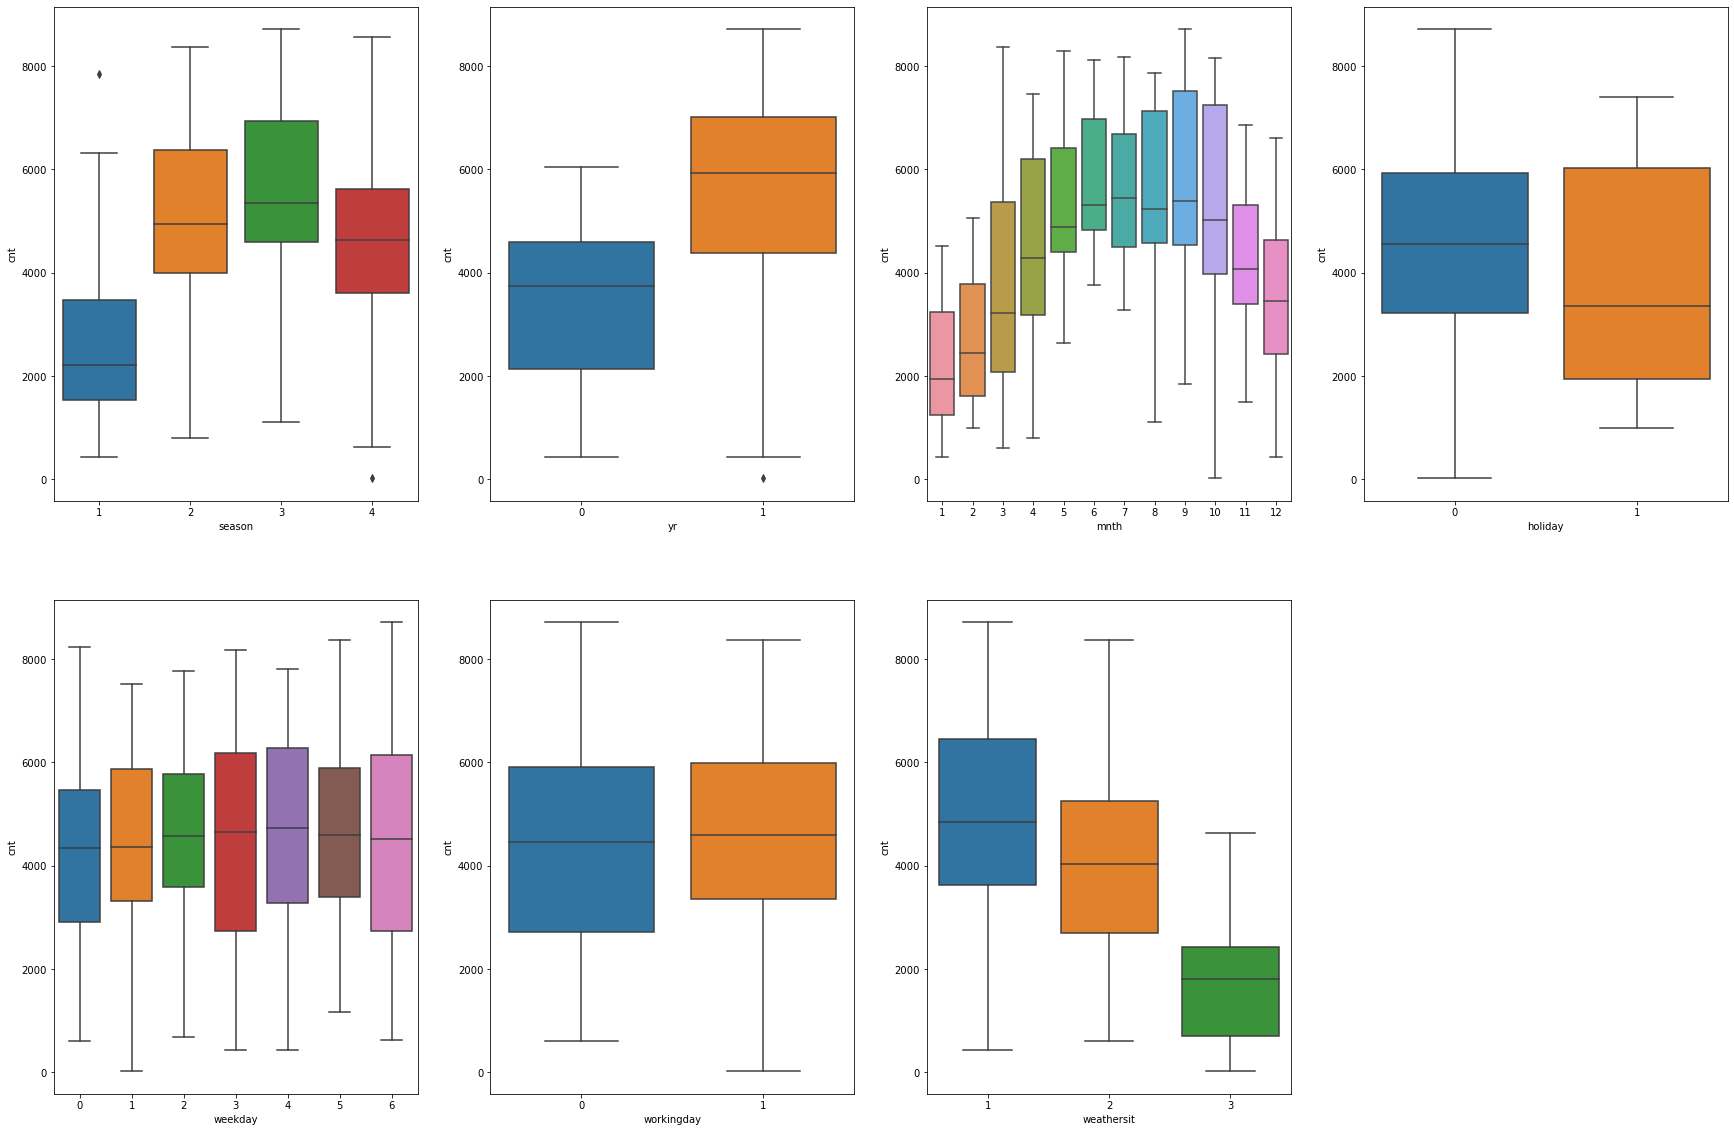

In [17]:
plt.figure(figsize=(30, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)
plt.show()

##  Data Cleansing 

In [18]:
#As a base line just assume all object are categorical . This assumption can be wrong as well but we get some idea. Excample Issue_yr maybe numerical however it can be categorical 
categorical  = []
quantitative = []
for col in bike_sharing_df.columns:
    if bike_sharing_df[col].dtypes == 'object':
        categorical.append(col)
    else:
        quantitative.append(col)
print("Categorical Variable are :\n {}\n".format(','.join(categorical)))
print("Quantitative  Varable  are :\n {}\n".format(','.join(quantitative)))

Categorical Variable are :
 dteday

Quantitative  Varable  are :
 instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt



In [19]:
data ={}
for column in quantitative:
    #print(column)
    unique_values = bike_sharing_df[column].unique().tolist()
    number_unique_values = len(unique_values)
    data[column] = {'cnt_unique_value' : number_unique_values , 'unique_values' : ';'.join(str(v) for v in unique_values), }

    if number_unique_values < 20:   
        #print("Unique Value for the Column {} : {} : Not Exapanding as the length is more than 10 ".format(column,number_unique_values))
        print("Unique Value for the Column {} : {} : {}".format(column,number_unique_values,unique_values))
    #else:
    #    print("Unique Value for the Column {} : {} : {}".format(column,number_unique_values,unique_values))
        



Unique Value for the Column season : 4 : [1, 2, 3, 4]
Unique Value for the Column yr : 2 : [0, 1]
Unique Value for the Column mnth : 12 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Unique Value for the Column holiday : 2 : [0, 1]
Unique Value for the Column weekday : 7 : [6, 0, 1, 2, 3, 4, 5]
Unique Value for the Column workingday : 2 : [0, 1]
Unique Value for the Column weathersit : 3 : [2, 1, 3]


In [20]:
bike_sharing_values = pd.DataFrame.from_dict(data,orient='index')
bike_sharing_values.sort_values(by='cnt_unique_value')
print(bike_sharing_values.loc['holiday'].values)
# You can see that the Unique value on each column in the dataframe if we need to have a summary 
bike_sharing_values.sort_values('cnt_unique_value')

# No Junk value that i can see 


[2 '0;1']


,cnt_unique_value,unique_values
yr,2,0;1
holiday,2,0;1
workingday,2,0;1
weathersit,3,2;1;3
season,4,1;2;3;4
weekday,7,6;0;1;2;3;4;5
mnth,12,1;2;3;4;5;6;7;8;9;10;11;12
temp,498,14.110847;14.902598;8.050924;8.2;9.305237;8.37...
hum,594,80.5833;69.6087;43.7273;59.0435;43.6957;51.826...
casual,605,331;131;120;108;82;88;148;68;54;41;43;25;38;22...


### As we can see we can drop the below Columns 

#### instant : Just the Index no value add 
#### dteday  : Reduntent Column for 'yr' and mnth
      - yr : year (0: 2018, 1:2019)
      - mnth : month ( 1 to 12)
#### casual :  We need to predict the 'cnt' columns and this column is a combination of casual and registered so no value add 
#### registered : We need to predict the 'cnt' columns and this column is a combination of casual and registered so no value add 


In [21]:
bike_sharing_df.shape

(730, 16)

In [22]:
drop_columns = ['instant', 'dteday', 'casual' , 'registered']
bike_sharing_df.drop(columns=drop_columns,inplace=True)

In [23]:
bike_sharing_df.shape

(730, 12)

In [24]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Perform One hot Encoding 

##### Perform ONehot encodingon columns 'season','weathersit','mnth','weekday'
    Unique Value for the Column season : 4 : [1, 2, 3, 4]
    Unique Value for the Column mnth : 12 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    Unique Value for the Column weekday : 7 : [6, 0, 1, 2, 3, 4, 5]
    Unique Value for the Column weathersit : 3 : [2, 1, 3]

##### Note : We ignored the 'yr' / 'holiday' and workingday as it is a binary value already
    Unique Value for the Column yr : 2 : [0, 1]
    Unique Value for the Column holiday : 2 : [0, 1]
    Unique Value for the Column workingday : 2 : [0, 1]


In [25]:
one_hot_encoding_columns = ['season','weathersit','mnth','weekday']
bike_sharing_df= pd.get_dummies(bike_sharing_df,columns=one_hot_encoding_columns,drop_first=True)

In [26]:
print("New Columns are : {}".format(','.join(bike_sharing_df.columns)))

New Columns are : yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6


In [27]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
bike_sharing_df.shape

(730, 30)

## Split dataset for training and testing

In [29]:
## np.random.seed(0) makes the random numbers predictable
np.random.seed(0)
bike_sharing_df_train, bike_sharing_df_test = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
bike_sharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Decided to go with MinMaxScaler than the Stanrdscalar
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_sharing_df_train[num_vars] = scaler.fit_transform(bike_sharing_df_train[num_vars])

In [32]:
bike_sharing_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Since we USED MINMAX YOU CAN SEE THE MIN AND MAX ARE 0 AND 1 

bike_sharing_df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
atemp,510.0,0.512989,0.212385,0.0,0.332086,0.526811,0.688457,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
season_2,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
season_3,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0


In [34]:
y_train = bike_sharing_df_train.pop('cnt')
X_train = bike_sharing_df_train

In [35]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [36]:
# Running RFE (RFE (Recursive Feature Elimination) 
# Note this is available only in the sklearn 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=13) # running RFE to limit only 13 features 
rfe = rfe.fit(X_train.values, y_train)


In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', False, 4),
 ('mnth_4', False, 6),
 ('mnth_5', False, 5),
 ('mnth_6', False, 7),
 ('mnth_7', False, 10),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weekday_1', False, 13),
 ('weekday_2', False, 14),
 ('weekday_3', False, 16),
 ('weekday_4', False, 17),
 ('weekday_5', False, 15),
 ('weekday_6', True, 1)]

In [38]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True])

In [39]:
rfe_selected_columns = bike_sharing_df_train.columns[rfe.support_]
rfe_rejected_columns = bike_sharing_df_train.columns[~rfe.support_]
print("Accepted columns by RFE are : {}".format(';'.join(rfe_selected_columns)))
print('XXXXXXXXXXX')
print("Rjected  columns by RFE are : {}".format(';'.join(rfe_rejected_columns)))

Accepted columns by RFE are : yr;holiday;workingday;temp;hum;windspeed;season_2;season_4;weathersit_2;weathersit_3;mnth_8;mnth_9;weekday_6
XXXXXXXXXXX
Rjected  columns by RFE are : atemp;season_3;mnth_2;mnth_3;mnth_4;mnth_5;mnth_6;mnth_7;mnth_10;mnth_11;mnth_12;weekday_1;weekday_2;weekday_3;weekday_4;weekday_5


### Build Model using StatModel

We will keep the Significance level Alpha  as 0.05 

In [40]:
# Helper function to Calculate the VIFs for the new model
def generate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [41]:
def train_model(X_train):
    # Add a constant for the statmodel  
    X_train_sm = sm.add_constant(X_train)
    #display(X_train_sm)
    # Using statmodel train it for the Ordinary Least Squares (OLS)
    lm = sm.OLS(y_train,X_train_sm).fit() 
    # Review the coefficient or parameters 
    display(pd.DataFrame(lm.params,columns=['coeff']))
    display(lm.summary())
    generate_VIF(X_train.columns.to_list(),X_train_sm)
    return (lm,X_train_sm)

In [42]:
# Just select the column that is suggested by RFE 
# Filter the Xtrain using the rfe_selected_columns 

X_train_sm_itr = X_train[rfe_selected_columns]
X_train_sm = X_train_sm_itr.copy()

In [43]:
X_train_sm_itr.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9,weekday_6
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,1


In [44]:
#import sys
#sys.exit()

## Let's Train with all the RFE selected columns 

In [45]:
lm = train_model(X_train_sm_itr)

,coeff
const,0.187657
yr,0.228914
holiday,-0.058111
workingday,0.043346
temp,0.539399
hum,-0.164739
windspeed,-0.182245
season_2,0.101995
season_4,0.148613
weathersit_2,-0.057896


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          3.81e-192
Time:                        19:05:46   Log-Likelihood:                 516.20
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.029      6.532      0.000       0.131       0.244
yr               0.2289      0.008     28.577      0.000       0.213       0.245
holiday         -0.0581      0.027     -2.153      0.032      -0.111      -0.005
workingday       0.0433      0.012      3.747      0.000       0.021       0.066
temp             0.5394      0.022     24.835      0.000       0.497       0.582
hum             -0.1647      0.037     -4.444      0.000      -0.238      -0.092
windspeed       -0.1822      0.025     -7.199      0.000      -0.232      -0.133
season_2         0.1020      0.011      9.481      0.000       0.081       0.123
season_4         0.1486      0.010     14.168      0.000       0.128       0.169
weathersit_2    -0.0579      0.010     -5.560      0.000      -0.078      -0.037
weathersit_3    -0.2431      0.026     -9.339      0.000      -0.294      -0.192
mnth_8           0.0523      0.016      3.250      0.001       0.021       0.084
mnth_9           0.1194      0.016      7.463      0.000       0.088       0.151
weekday_6        0.0520      0.015      3.568      0.000       0.023       0.081
==============================================================================
Omnibus:                       62.101   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.360
Skew:                          -0.645   Prob(JB):                     1.65e-32
Kurtosis:                       5.285   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
4,hum,16.57
3,temp,9.76
2,workingday,5.01
5,windspeed,3.82
8,weathersit_2,2.13
0,yr,2.02
12,weekday_6,1.90
6,season_2,1.82
7,season_4,1.75
10,mnth_8,1.59


## You can see that all P value are below 0.05 significance so let's check the VIR with hig value which is "hum" with 16.57. So Let's drop and train again 

In [46]:
X_train_sm_itr.drop(columns='hum',inplace=True)
#display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,coeff
const,0.090690
yr,0.232622
holiday,-0.056396
workingday,0.046465
temp,0.518844
windspeed,-0.150864
season_2,0.099146
season_4,0.139395
weathersit_2,-0.084403
weathersit_3,-0.288180


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          3.89e-189
Time:                        19:05:46   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     497   BIC:                            -931.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0907      0.019      4.764      0.000       0.053       0.128
yr               0.2326      0.008     28.664      0.000       0.217       0.249
holiday         -0.0564      0.027     -2.052      0.041      -0.110      -0.002
workingday       0.0465      0.012      3.950      0.000       0.023       0.070
temp             0.5188      0.022     24.001      0.000       0.476       0.561
windspeed       -0.1509      0.025     -6.092      0.000      -0.200      -0.102
season_2         0.0991      0.011      9.064      0.000       0.078       0.121
season_4         0.1394      0.010     13.308      0.000       0.119       0.160
weathersit_2    -0.0844      0.009     -9.708      0.000      -0.101      -0.067
weathersit_3    -0.2882      0.024    -11.800      0.000      -0.336      -0.240
mnth_8           0.0510      0.016      3.108      0.002       0.019       0.083
mnth_9           0.1135      0.016      6.990      0.000       0.082       0.145
weekday_6        0.0571      0.015      3.854      0.000       0.028       0.086
==============================================================================
Omnibus:                       61.426   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.804
Skew:                          -0.643   Prob(JB):                     9.78e-32
Kurtosis:                       5.251   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.81
11,weekday_6,1.76
9,mnth_8,1.58
7,weathersit_2,1.54
6,season_4,1.53
10,mnth_9,1.31


## As you can see p-Value are all below 0.05 and also the VIF we normally look anything above 5 . You can see that we hvae 2 VIF > 5 whcih is temp and workingday
## As per our intution we will not drop temp which has hig VIR and the reason is by our indution that it is a key factor for cycling
## So let's drop workingday and train and see the idea is to bring all pvalue < 0.05 and VIF < 5 as well 

In [47]:
X_train_sm_itr.drop(columns='workingday',inplace=True)
#display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,coeff
const,0.128131
yr,0.232904
holiday,-0.093963
temp,0.518678
windspeed,-0.151688
season_2,0.100094
season_4,0.138093
weathersit_2,-0.082602
weathersit_3,-0.283304
mnth_8,0.053449


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          5.28e-187
Time:                        19:05:46   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     498   BIC:                            -921.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1281      0.017      7.649      0.000       0.095       0.161
yr               0.2329      0.008     28.288      0.000       0.217       0.249
holiday         -0.0940      0.026     -3.591      0.000      -0.145      -0.043
temp             0.5187      0.022     23.649      0.000       0.476       0.562
windspeed       -0.1517      0.025     -6.037      0.000      -0.201      -0.102
season_2         0.1001      0.011      9.021      0.000       0.078       0.122
season_4         0.1381      0.011     13.001      0.000       0.117       0.159
weathersit_2    -0.0826      0.009     -9.377      0.000      -0.100      -0.065
weathersit_3    -0.2833      0.025    -11.448      0.000      -0.332      -0.235
mnth_8           0.0534      0.017      3.215      0.001       0.021       0.086
mnth_9           0.1159      0.016      7.037      0.000       0.084       0.148
weekday_6        0.0187      0.011      1.651      0.099      -0.004       0.041
==============================================================================
Omnibus:                       60.647   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.960
Skew:                          -0.673   Prob(JB):                     4.45e-28
Kurtosis:                       5.029   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,5.03
3,windspeed,3.17
0,yr,2.00
4,season_2,1.81
8,mnth_8,1.58
5,season_4,1.49
6,weathersit_2,1.49
9,mnth_9,1.31
10,weekday_6,1.18
7,weathersit_3,1.08


## Let's drop the mnth_9 which has p-value  > 5 ( 0.099)

In [48]:
X_train_sm_itr.drop(columns='weekday_6',inplace=True)
#display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,coeff
const,0.131241
yr,0.232489
holiday,-0.097109
temp,0.517361
windspeed,-0.149737
season_2,0.099972
season_4,0.138343
weathersit_2,-0.082534
weathersit_3,-0.282834
mnth_8,0.054165


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          1.26e-187
Time:                        19:05:46   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871      0.000       0.098       0.164
yr               0.2325      0.008     28.202      0.000       0.216       0.249
holiday         -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temp             0.5174      0.022     23.564      0.000       0.474       0.560
windspeed       -0.1497      0.025     -5.956      0.000      -0.199      -0.100
season_2         0.1000      0.011      8.995      0.000       0.078       0.122
season_4         0.1383      0.011     13.003      0.000       0.117       0.159
weathersit_2    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
weathersit_3    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
mnth_8           0.0542      0.017      3.253      0.001       0.021       0.087
mnth_9           0.1162      0.016      7.045      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.81
8,mnth_8,1.58
5,season_4,1.49
6,weathersit_2,1.48
9,mnth_9,1.31
7,weathersit_3,1.08
1,holiday,1.04


In [49]:
## AS you can see that only the windspeed has the VIF . However temp is still above 5.01.
## From the scatter the windspeed doesn;t look like a key element so let's drop it 

In [50]:
X_train_sm_itr.drop(columns='windspeed',inplace=True)
#display(X_train_sm_itr)
lm = train_model(X_train_sm_itr)

,coeff
const,0.070264
yr,0.231263
holiday,-0.100177
temp,0.539040
season_2,0.095578
season_4,0.146153
weathersit_2,-0.080930
weathersit_3,-0.297362
mnth_8,0.058455
mnth_9,0.123609


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          1.99e-181
Time:                        19:05:46   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
yr               0.2313      0.009     27.142      0.000       0.215       0.248
holiday         -0.1002      0.027     -3.707      0.000      -0.153      -0.047
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,3.92
0,yr,1.94
3,season_2,1.78
7,mnth_8,1.56
4,season_4,1.47
5,weathersit_2,1.44
8,mnth_9,1.29
6,weathersit_3,1.06
1,holiday,1.03


## Now you can see that all VIF below 5 and also the P value are signifinace all < 0.05 .So we will stop this iteration here as the test scrore for iteration is 82% as well 

F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 257.6
Prob (F-statistic): 1.99e-181
The F-Statistics value of 257.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant


The equation of best fitted surface based on model : ( see the above coefficient table ) 
cnt = 	0.070264 + (yr × 0.231263)  - (holiday × 0.100177) − (temp ×0.539040) + (season2 × 0.080930) + (season4 × 0.297362)  − (weathersit2 × 0.080930) − (weathersit3 × 0.297362) + (mnth_8 x 0.058455) + (mnth_9 x 0.123609) 



In [51]:
print("Final Model Summary ")
print("XXXXXXXXXX")
display(lm[0].summary())

print("Final Coefficient")
print("XXXXXXXXXXXXXXXXX")
display(pd.DataFrame(lm[0].params,columns=['coeff']))

print("VIF info")
print("XXXXXXXX")
vif = pd.DataFrame()
vif['Features'] = X_train_sm_itr.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_itr.values, i) for i in range(X_train_sm_itr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Final Model Summary 
XXXXXXXXXX


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 30 Nov 2022   Prob (F-statistic):          1.99e-181
Time:                        19:05:47   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
yr               0.2313      0.009     27.142      0.000       0.215       0.248
holiday         -0.1002      0.027     -3.707      0.000      -0.153      -0.047
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Coefficient
XXXXXXXXXXXXXXXXX


,coeff
const,0.070264
yr,0.231263
holiday,-0.100177
temp,0.539040
season_2,0.095578
season_4,0.146153
weathersit_2,-0.080930
weathersit_3,-0.297362
mnth_8,0.058455
mnth_9,0.123609


VIF info
XXXXXXXX


,Features,VIF
2,temp,3.92
0,yr,1.94
3,season_2,1.78
7,mnth_8,1.56
4,season_4,1.47
5,weathersit_2,1.44
8,mnth_9,1.29
6,weathersit_3,1.06
1,holiday,1.03


In [52]:
X_train_sm_itr
X_train_sm_itr = sm.add_constant(lm[1])

In [53]:
print(X_train_sm_itr.shape)
X_train_sm_itr.head()

(510, 10)


,const,yr,holiday,temp,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9
653,1.0,1,0,0.509887,0,1,0,0,0,0
576,1.0,1,0,0.815169,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,1,0,0,0
728,1.0,1,0,0.245101,0,0,0,0,0,0
482,1.0,1,0,0.395666,1,0,1,0,0,0


In [54]:
y_train_cnt = lm[0].predict(X_train_sm_itr)

In [55]:
np.sqrt(mean_squared_error(y_train, y_train_cnt))
# You can see that the mean swayre is 0.09 which is ok for a model 

0.09450945466073261

Text(0.5, 0, 'Residuals')

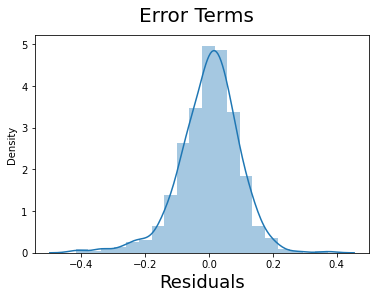

In [56]:
# Plot the histogram of the error (residuals) terms just to confirm it is normalized and it is indeed
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                         # X-label

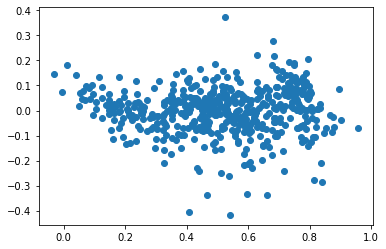

In [57]:
# Thet are independent as well 

plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

In [58]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_sharing_df_test[num_vars] = scaler.transform(bike_sharing_df_test[num_vars])

In [59]:
bike_sharing_df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
bike_sharing_df_test.shape

(219, 30)

In [61]:
y_test = bike_sharing_df_test.pop('cnt')
X_test = bike_sharing_df_test

In [62]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [63]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_sm_itr.drop(columns='const').columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,season_2,season_4,weathersit_2,weathersit_3,mnth_8,mnth_9
184,1.0,0,1,0.831783,0,0,1,0,0,0
535,1.0,1,0,0.901354,1,0,0,0,0,0
299,1.0,0,0,0.511964,0,1,1,0,0,0
221,1.0,0,0,0.881625,0,0,0,0,1,0
152,1.0,0,0,0.817246,1,0,0,0,0,0


In [65]:
y_pred = lm[0].predict(X_test_new)
X_test_new.shape

(219, 10)

Text(0, 0.5, 'y_pred')

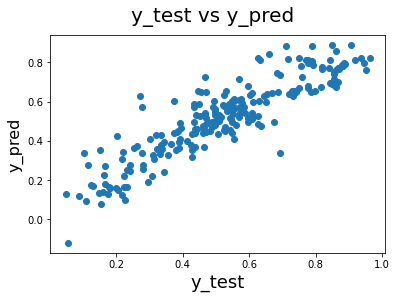

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

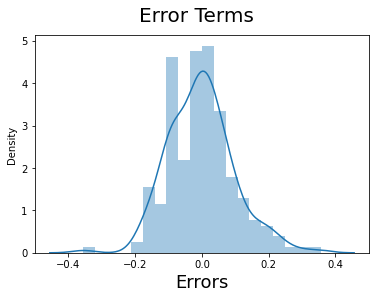

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_pred - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09831923448041519

In [69]:
#Returns the mean squared error; we'll take a square root

error_df=pd.concat({'Y_Pred': y_pred,
              'Y_Test': y_test,
              },axis=1)


In [70]:
error_df

,Y_Pred,Y_Test
184,0.337521,0.692706
535,0.882970,0.712034
299,0.411456,0.303382
221,0.603950,0.547400
152,0.606370,0.569029
...,...,...
400,0.359432,0.336516
702,0.727566,0.757478
127,0.480991,0.495973
640,0.768656,0.868615


In [71]:
R2 = r2_score(y_test, y_pred)
R2

0.7964731574157415

In [72]:
# n is number of rows in X

n = X_test.shape[0]
#print(n)

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
#print(p)

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_r2

0.7652441709874691

In [73]:
result = {}
result['Training Set'] = {'R2' : 0.823 , 'Adjusted-R2' : 0.819 }
result['Test Set'] = {'R2' : R2 , 'Adjusted-R2' : adjusted_r2 }
result_df = pd.DataFrame.from_dict(result,orient='index')

In [74]:
result_df

,R2,Adjusted-R2
Training Set,0.823000,0.819000
Test Set,0.796473,0.765244
